In [17]:
import pandas as pd
import numpy as np

provinces = ["anhui","beijing","chongqing","fujian","gansu","guangdong","guangxi","guizhou","hainan","hebei","heilongjiang","henan","jiangsu","jiangxi","jiling","liaoning","neimenggu","ningxia","qinghai","shan_xi","shandong","shanghai","shanxi","sichuan","tianjin","xinjiang","xizang","yunnan","zhejiang"]
file_names = list(map(lambda x:x + ".xlsx",provinces))
dataframes = list(map(lambda x:pd.read_excel(x),file_names))

In [21]:
table = pd.concat(dataframes).to_excel("total_2018.xlsx")

In [95]:
table_change = pd.read_excel("total_2018.xlsx")

In [96]:
table_analysis = table_change[["职位所属大单位","职位所属大小单位","中央层级","工作地点","落户地点","职位所属","职位名称","职位数量","报名人数","过审人数","竞争比","职位类型"]]

In [97]:
table_analysis["报名人数"] = list(map(lambda x:x.strip("\t\t\t\t\t\t查看报名大数据\n"),table_analysis["报名人数"]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
table_xibu = table_analysis[table_analysis["职位类型"] == "西部地区和艰苦边远地区职位"]

In [125]:
table_clean = table_xibu.drop(table_xibu[table_xibu["竞争比"] == " "].index)

In [126]:
table_clean["竞争比"] = list(map(lambda x:float(x),table_clean["竞争比"]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
table_clean.sort_values("竞争比",ascending = False).to_excel("ranking.xlsx")

In [134]:
table2 = pd.read_excel("ranking2.xlsx")

In [137]:
table_pivot_2 = table2.groupby("竞争比").count()
table_pivot_2["竞争比"] = table_pivot_2.index

In [141]:
table_pivot_1 = table_clean.groupby("竞争比").count()
table_pivot_1["竞争比"] = table_pivot_1.index

In [145]:
table_plot_1 = table_pivot_1[["职位类型","竞争比"]]

In [187]:
table_clean[table_clean["竞争比"] < 10].count()

职位所属大单位     1340
职位所属大小单位    1340
中央层级        1340
工作地点        1340
落户地点        1340
职位所属        1340
职位名称        1340
职位数量        1340
报名人数        1340
过审人数        1340
竞争比         1340
职位类型        1340
dtype: int64

In [225]:
table_clean["工作地点"]

291           重庆市
364        四川省宜宾市
365        四川省宜宾市
366           重庆市
367           重庆市
368           重庆市
369           重庆市
370           重庆市
371           重庆市
372           重庆市
374           重庆市
375           重庆市
376           重庆市
0             重庆市
1          重庆市万州区
5          重庆市万州区
7             重庆市
9          重庆市万州区
10         重庆市南岸区
11         重庆市綦江区
13        重庆市九龙坡区
15         重庆市永川区
16         重庆市永川区
17         重庆市永川区
20         重庆市开州区
21         重庆市璧山区
24            重庆市
25         重庆市大足区
26         重庆市大足区
27         重庆市綦江区
          ...    
749        曲靖市陆良县
750        曲靖市陆良县
751        保山市龙陵县
752        保山市龙陵县
753        保山市腾冲市
754        保山市施甸县
755        保山市施甸县
756    大理白族自治州大理市
757    大理白族自治州大理市
758    大理白族自治州大理市
759        保山市腾冲市
760    大理白族自治州大理市
761    大理白族自治州大理市
762    大理白族自治州大理市
763        保山市施甸县
764    大理白族自治州大理市
765    昆明市石林彝族自治县
766        昆明市宜良县
767        昆明市宜良县
768        昆明市宜良县
769        昆明市富民县
770        昆明市富民县
771        昆明市富民县
772        昆明市晋宁区
773       

In [215]:
import requests
from bs4 import BeautifulSoup

url = "https://restapi.amap.com/v3/geocode/geo?address=" + "西双版纳傣族自治州景洪市" + "&output=JSON&key=f399980733b09d69e1d837d1d2724922"
html = requests.get(url)
print(html.text)

{"status":"1","info":"OK","infocode":"10000","count":"1","geocodes":[{"formatted_address":"云南省西双版纳傣族自治州景洪市","country":"中国","province":"云南省","citycode":"0691","city":"西双版纳傣族自治州","district":"景洪市","township":[],"neighborhood":{"name":[],"type":[]},"building":{"name":[],"type":[]},"adcode":"532801","street":[],"number":[],"location":"100.771679,22.000143","level":"区县"}]}


In [248]:
import requests
from bs4 import BeautifulSoup
import json

location_list_2 = []
index = 0
for address in table_clean["工作地点"][4968:]:
    url = "https://restapi.amap.com/v3/geocode/geo?address=" + address + "&output=JSON&key=f399980733b09d69e1d837d1d2724922"
    html = requests.get(url)
    add = json.loads(html.text)
    location = add["geocodes"][0]["location"]
    location_list_2.append(location)
    index += 1
    print(index)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [249]:
len(location_list_2)

550

In [250]:
table_clean["location"] = location_list + location_list_2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [252]:
table_clean.to_excel("2018_west.xlsx")

In [261]:
table_place = table_clean[table_clean["竞争比"] > 100].sort_values("竞争比",ascending = False)

In [275]:
from collections import Counter
pd.DataFrame([Counter(table_place["工作地点"])]).T.to_excel("place.xlsx")

In [293]:
table2["工作地点"]

2            西双版纳傣族自治州景洪市
5                  成都市双流区
9                  通化市柳河县
10                 昆明市晋宁区
11                 成都市新都区
13                 贵州省贵阳市
15                防城港市港口区
16                 玉溪市红塔区
17                 昆明市安宁市
20                 成都市武侯区
24                 四川省眉山市
25                 保山市昌宁县
26                 成都市郫都区
28             大理白族自治州大理市
30                 成都市青羊区
32                 兰州市城关区
33                 运城市永济市
34                广西壮族自治区
46                 绥化市肇东市
48                 玉溪市红塔区
56               六盘水市六枝特区
57                成都市青白江区
61             果洛藏族自治州玛沁县
64                 云南省临沧市
73                 乐山市市中区
76                 四川省成都市
77             玉溪市峨山彝族自治县
83         黔西南布依族苗族自治州兴仁县
93                 贵阳市白云区
101            楚雄彝族自治州双柏县
              ...        
9571          锡林郭勒盟西乌珠穆沁旗
9574               重庆市巫山县
9585               山西省晋中市
9588              通化市梅河口市
9592              黑龙江省绥化市
9593                西藏自治区
9594    新疆维吾尔自治区博尔塔拉蒙古自治州
9595        

In [287]:
import cpca
df = cpca.transform(table_place["工作地点"])

In [307]:
pd.DataFrame([Counter(df["省"])]).T.to_excel("pro1.xlsx")

In [301]:
table_place_2 = table2[table2["竞争比"] > 100]
df2 = cpca.transform(table_place_2["工作地点"])

In [308]:
pd.DataFrame([Counter(df2["省"])]).T.to_excel("pro2.xlsx")

In [309]:
table2

,用人司局,竞争比,工作地点,location
2,国家统计局云南调查总队,3662.000000,西双版纳傣族自治州景洪市,"100.771679,22.000143"
5,国家税务总局成都市双流区税务局,2471.000000,成都市双流区,"103.951908,30.333027"
9,国家税务总局柳河县税务局,2023.000000,通化市柳河县,"125.744735,42.284606"
10,国家统计局云南调查总队,1941.000000,昆明市晋宁区,"102.832891,24.880095"
11,国家税务总局成都市新都区税务局,1831.000000,成都市新都区,"104.158705,30.823499"
13,国家税务总局贵州双龙航空港经济区税务局,1724.500000,贵州省贵阳市,"106.630153,26.647661"
15,防城港市邮政管理局,1709.000000,防城港市港口区,"108.380144,21.643384"
16,国家统计局云南调查总队,1681.000000,玉溪市红塔区,"102.540179,24.341098"
17,国家税务总局安宁市税务局,1660.000000,昆明市安宁市,"102.478494,24.919493"
20,国家税务总局成都市武侯区税务局,1394.000000,成都市武侯区,"104.043390,30.641982"


In [221]:
#len(location_list)
table2["location"] = location_list

In [223]:
table2.to_excel("2019_west.xlsx")

In [146]:
table_plot_2 = table_pivot_2[["工作地点","竞争比"]]

138.05084112149532


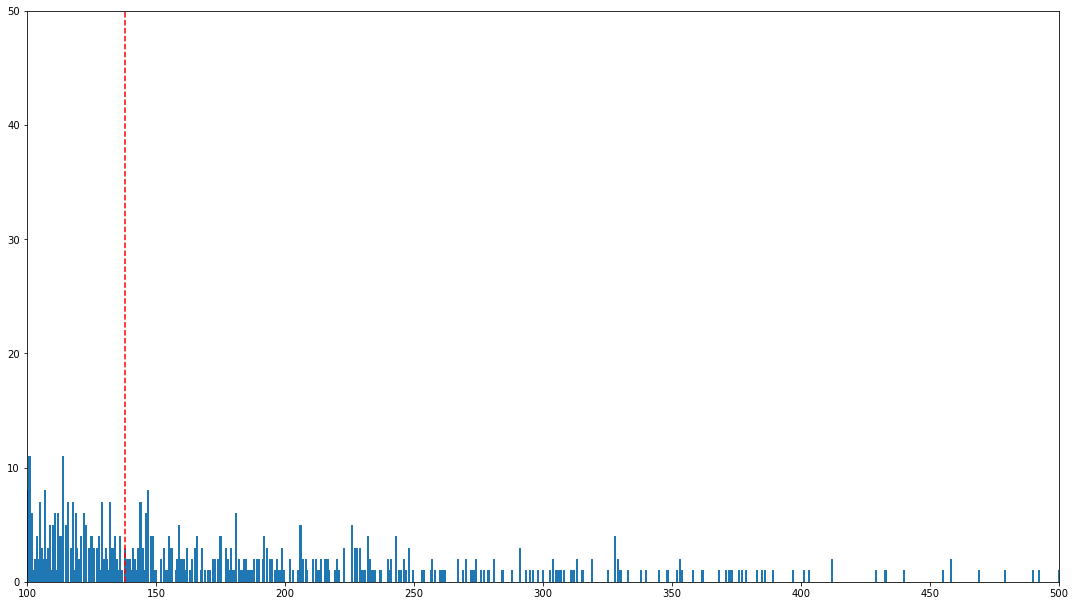

In [194]:
from matplotlib import pyplot as plt

subplot1 = plt.bar(list(table_plot_1["竞争比"]),table_plot_1["职位类型"])
mean_num = table_plot_1["竞争比"].mean()
print(mean_num)
#plt.plot(plot_table1["rank"],plot_table1["吃香程度"])

plt.vlines(10, 0, 10000, colors = "g", linestyles = "dashed")
plt.vlines(mean_num, 0, 10000, colors = "r", linestyles = "dashed")

my_x_ticks = table_plot_1["竞争比"]

plt.xlim((100, 500))
plt.ylim((0, 50))
plt.xlabel = [0,10,20,30,40]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

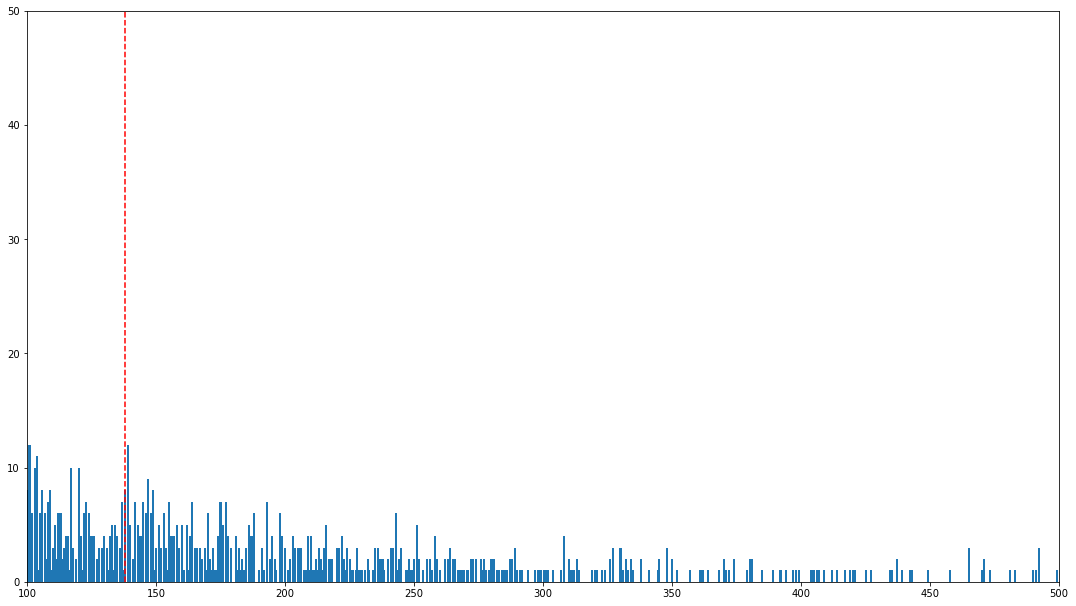

In [195]:
from matplotlib import pyplot as plt

subplot1 = plt.bar(list(table_plot_2["竞争比"]),table_plot_2["工作地点"])
mean_num = table_plot_1["竞争比"].mean()
#plt.plot(plot_table1["rank"],plot_table1["吃香程度"])

plt.vlines(10, 0, 10000, colors = "g", linestyles = "dashed")
plt.vlines(mean_num, 0, 10000, colors = "r", linestyles = "dashed")

my_x_ticks = table_plot_1["竞争比"]

plt.xlim((100, 500))
plt.ylim((0, 50))
plt.xlabel = [0,10,20,30,40]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()